In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [ ]:
df1 = pd.read_csv("/content/Project/MELBOURNE_HOUSE_PRICES_LESS_UPDATE.csv")
df1.head()

,location,rooms,area_type,price,SellerG,date,post_code,total_sqft,region_name,property_count,distance,society,balcony,bath,size
0,Abbotsford,3,h,1490000.0,Jellis,1/04/2017,3067,1520,Northern Metropolitan,4019,3.0,Yarra City Council,1.0,2.0,2 BHK
1,Abbotsford,3,h,1220000.0,Marshall,1/04/2017,3067,1740,Northern Metropolitan,4019,3.0,Yarra City Council,3.0,5.0,4 Bedroom
2,Abbotsford,3,h,1420000.0,Nelson,1/04/2017,3067,1440,Northern Metropolitan,4019,3.0,Yarra City Council,3.0,2.0,3 BHK
3,Aberfeldie,3,h,1515000.0,Barry,1/04/2017,3040,1521,Western Metropolitan,1543,7.5,Moonee Valley City Council,1.0,3.0,3 BHK
4,Airport West,2,h,670000.0,Nelson,1/04/2017,3042,1056,Western Metropolitan,3464,10.4,Moonee Valley City Council,1.0,2.0,2 BHK


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1.shape

(63023, 15)

In [ ]:
df1.columns

Index(['location', 'rooms', 'area_type', 'price', 'SellerG', 'date',
       'post_code', 'total_sqft', 'region_name', 'property_count', 'distance',
       'society', 'balcony', 'bath', 'size'],
      dtype='object')

In [ ]:
df1['area_type'].unique()


array(['h', 't', 'u'], dtype=object)

In [ ]:
df1['area_type'].value_counts()

,count
area_type,
h,45053
u,11655
t,6315


Drop features that are not required to build our model

In [ ]:
df2 = df1.drop(['area_type','society','balcony'],axis='columns')
df2.shape

(63023, 12)

Data Cleaning: Handle NA Values


In [ ]:
df2.isnull().sum()

,0
location,0
rooms,0
price,14565
SellerG,0
date,0
post_code,0
total_sqft,36307
region_name,0
property_count,0
distance,0


In [ ]:

df2.shape

(63023, 12)

In [ ]:
df3 = df2.dropna()
df3.isnull().sum()

,0
location,0
rooms,0
price,0
SellerG,0
date,0
post_code,0
total_sqft,0
region_name,0
property_count,0
distance,0


In [ ]:

df3.shape

(10139, 12)

Feature Engineering

Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [ ]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

<ipython-input-16-681cf3aca53d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  5,  7, 11,  9, 27, 10, 16, 43, 14, 12, 13])

In [ ]:
df3.head()

,location,rooms,price,SellerG,date,post_code,total_sqft,region_name,property_count,distance,bath,size,bhk
0,Abbotsford,3,1490000.0,Jellis,1/04/2017,3067,1520,Northern Metropolitan,4019,3.0,2.0,2 BHK,2
1,Abbotsford,3,1220000.0,Marshall,1/04/2017,3067,1740,Northern Metropolitan,4019,3.0,5.0,4 Bedroom,4
2,Abbotsford,3,1420000.0,Nelson,1/04/2017,3067,1440,Northern Metropolitan,4019,3.0,2.0,3 BHK,3
3,Aberfeldie,3,1515000.0,Barry,1/04/2017,3040,1521,Western Metropolitan,1543,7.5,3.0,3 BHK,3
4,Airport West,2,670000.0,Nelson,1/04/2017,3042,1056,Western Metropolitan,3464,10.4,2.0,2 BHK,2


In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,rooms,price,SellerG,date,post_code,total_sqft,region_name,property_count,distance,bath,size,bhk
30,Avondale Heights,4,825000.0,hockingstuart,1/04/2017,3034,2100 - 2850,Western Metropolitan,4502,9.5,4.0,4 BHK,4
122,Camberwell,2,868000.0,RT,1/04/2017,3124,3067 - 8156,Southern Metropolitan,8920,7.7,4.0,4 BHK,4
137,Carnegie,1,295000.0,Ray,1/04/2017,3163,1042 - 1105,Southern Metropolitan,7822,10.1,2.0,2 BHK,2
165,Coburg,2,430000.0,Woodards,1/04/2017,3058,1145 - 1340,Northern Metropolitan,11204,6.7,2.0,2 BHK,2
410,Montmorency,3,820000.0,Fletchers,1/04/2017,3094,34.46Sq. Meter,Eastern Metropolitan,3891,16.2,1.0,1 BHK,1
549,Seaford,4,701000.0,U,1/04/2017,3198,1195 - 1440,South-Eastern Metropolitan,8077,35.4,2.0,2 BHK,2
672,Airport West,2,593000.0,Nelson,1/07/2017,3042,3090 - 5002,Western Metropolitan,3464,10.4,4.0,4 Bedroom,4
772,Craigieburn,4,509500.0,@Realty,1/07/2017,3064,1160 - 1195,Northern Metropolitan,15510,20.6,2.0,2 BHK,2
775,Croydon,4,932000.0,Hoskins,1/07/2017,3136,1000Sq. Meter,Eastern Metropolitan,11925,23.0,2.0,1 BHK,1
850,Glenroy,3,595000.0,Eview,1/07/2017,3046,1115 - 1130,Northern Metropolitan,8870,11.2,2.0,2 BHK,2


In [ ]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [ ]:
convert_sqft_to_num('2166')

2166.0

In [ ]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [ ]:
convert_sqft_to_num('34.46Sq. Meter')

In [ ]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,rooms,price,SellerG,date,post_code,total_sqft,region_name,property_count,distance,bath,size,bhk
0,Abbotsford,3,1490000.0,Jellis,1/04/2017,3067,1520.0,Northern Metropolitan,4019,3.0,2.0,2 BHK,2
1,Abbotsford,3,1220000.0,Marshall,1/04/2017,3067,1740.0,Northern Metropolitan,4019,3.0,5.0,4 Bedroom,4


In [ ]:
df4.loc[50]

,50
location,Bellfield
rooms,3
price,675000.0
SellerG,Nelson
date,1/04/2017
post_code,3081
total_sqft,1270.0
region_name,Eastern Metropolitan
property_count,790
distance,8.8


In [ ]:
(2100+2850)/2

2475.0

In [ ]:
df4.head(5)

,location,rooms,price,SellerG,date,post_code,total_sqft,region_name,property_count,distance,bath,size,bhk
0,Abbotsford,3,1490000.0,Jellis,1/04/2017,3067,1520.0,Northern Metropolitan,4019,3.0,2.0,2 BHK,2
1,Abbotsford,3,1220000.0,Marshall,1/04/2017,3067,1740.0,Northern Metropolitan,4019,3.0,5.0,4 Bedroom,4
2,Abbotsford,3,1420000.0,Nelson,1/04/2017,3067,1440.0,Northern Metropolitan,4019,3.0,2.0,3 BHK,3
3,Aberfeldie,3,1515000.0,Barry,1/04/2017,3040,1521.0,Western Metropolitan,1543,7.5,3.0,3 BHK,3
4,Airport West,2,670000.0,Nelson,1/04/2017,3042,1056.0,Western Metropolitan,3464,10.4,2.0,2 BHK,2


Feature Engineering
Add new feature called Price_per_sqft


In [ ]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,rooms,price,SellerG,date,post_code,total_sqft,region_name,property_count,distance,bath,size,bhk,price_per_sqft
0,Abbotsford,3,1490000.0,Jellis,1/04/2017,3067,1520.0,Northern Metropolitan,4019,3.0,2.0,2 BHK,2,9.802632e+07
1,Abbotsford,3,1220000.0,Marshall,1/04/2017,3067,1740.0,Northern Metropolitan,4019,3.0,5.0,4 Bedroom,4,7.011494e+07
2,Abbotsford,3,1420000.0,Nelson,1/04/2017,3067,1440.0,Northern Metropolitan,4019,3.0,2.0,3 BHK,3,9.861111e+07
3,Aberfeldie,3,1515000.0,Barry,1/04/2017,3040,1521.0,Western Metropolitan,1543,7.5,3.0,3 BHK,3,9.960552e+07
4,Airport West,2,670000.0,Nelson,1/04/2017,3042,1056.0,Western Metropolitan,3464,10.4,2.0,2 BHK,2,6.344697e+07


In [ ]:
len(df5.location.unique())

331

In [ ]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count')
location_stats

,location
location,
Abbotsford,24
Aberfeldie,19
Airport West,55
Albanvale,4
Albert Park,28
...,...
Wonga Park,1
Woori Yallock,1
Wyndham Vale,27


In [ ]:
len(location_stats[location_stats<=10])

106

In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

,location
location,
Albanvale,4
Bacchus Marsh,3
Balaclava,10
Bayswater North,9
Beaconsfield,1
...,...
Werribee South,1
Williams Landing,4
Williamstown North,4


In [ ]:
len(df5.location.unique())

331

In [ ]:
df5.location =df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len (df5.location.unique())

226

In [ ]:
df5.head(10)

,location,rooms,price,SellerG,date,post_code,total_sqft,region_name,property_count,distance,bath,size,bhk,price_per_sqft
0,Abbotsford,3,1490000.0,Jellis,1/04/2017,3067,1520.0,Northern Metropolitan,4019,3.0,2.0,2 BHK,2,9.802632e+07
1,Abbotsford,3,1220000.0,Marshall,1/04/2017,3067,1740.0,Northern Metropolitan,4019,3.0,5.0,4 Bedroom,4,7.011494e+07
2,Abbotsford,3,1420000.0,Nelson,1/04/2017,3067,1440.0,Northern Metropolitan,4019,3.0,2.0,3 BHK,3,9.861111e+07
3,Aberfeldie,3,1515000.0,Barry,1/04/2017,3040,1521.0,Western Metropolitan,1543,7.5,3.0,3 BHK,3,9.960552e+07
4,Airport West,2,670000.0,Nelson,1/04/2017,3042,1056.0,Western Metropolitan,3464,10.4,2.0,2 BHK,2,6.344697e+07
5,Airport West,2,530000.0,Jellis,1/04/2017,3042,2600.0,Western Metropolitan,3464,10.4,2.0,2 BHK,2,2.038462e+07
6,Airport West,2,540000.0,Barry,1/04/2017,3042,2732.0,Western Metropolitan,3464,10.4,4.0,4 BHK,4,1.976574e+07
7,Airport West,3,715000.0,Nelson,1/04/2017,3042,3300.0,Western Metropolitan,3464,10.4,4.0,4 BHK,4,2.166667e+07
8,other,6,715000.0,hockingstuart,1/04/2017,3021,1310.0,Western Metropolitan,1899,14.0,3.0,3 BHK,3,5.458015e+07
9,Albert Park,3,1925000.0,Cayzer,1/04/2017,3206,1020.0,Southern Metropolitan,3280,3.0,6.0,6 Bedroom,6,1.887255e+08


In [ ]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,rooms,price,SellerG,date,post_code,total_sqft,region_name,property_count,distance,bath,size,bhk,price_per_sqft
9,Albert Park,3,1925000.0,Cayzer,1/04/2017,3206,1020.0,Southern Metropolitan,3280,3.0,6.0,6 Bedroom,6,1.887255e+08
45,Beaumaris,4,1285000.0,Buxton,1/04/2017,3193,600.0,Southern Metropolitan,5366,17.3,9.0,8 Bedroom,8,2.141667e+08
58,Bentleigh East,3,920000.0,Buxton,1/04/2017,3165,1407.0,Southern Metropolitan,10969,13.8,4.0,6 Bedroom,6,6.538735e+07
68,Blackburn North,5,1090000.0,Noel,1/04/2017,3130,1350.0,Eastern Metropolitan,2867,13.4,7.0,8 Bedroom,8,8.074074e+07
70,Blackburn South,3,1000000.0,Woodards,1/04/2017,3130,500.0,Eastern Metropolitan,4387,13.4,3.0,3 Bedroom,3,2.000000e+08


In [ ]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

,price_per_sqft
count,1.010400e+04
mean,8.181935e+07
std,2.506400e+08
min,1.013889e+06
25%,4.133333e+07
50%,6.218261e+07
75%,9.691948e+07
max,2.412000e+10


In [ ]:
df5.to_csv("/content/Project/MELBOURNE_HOUSE_PRICES_LESS_UPDATE.csv",index=False)

Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [ ]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

,count
location,
other,520
Reservoir,217
Bentleigh East,146
Richmond,136
Craigieburn,131
...,...
Kealba,11
Keilor,11
Middle Park,11


In [ ]:
location_stats.values.sum()

10104

In [ ]:
len(location_stats[location_stats>10])

226

In [ ]:
len(location_stats)

226

In [ ]:
len(location_stats[location_stats<=10])

0

Dimensionality Reduction

Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

,count
location,


In [ ]:
len(df5.location.unique())

226

In [ ]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

226

In [ ]:
df5.head(10)

,location,rooms,price,SellerG,date,post_code,total_sqft,region_name,property_count,distance,bath,size,bhk,price_per_sqft
0,Abbotsford,3,1490000.0,Jellis,1/04/2017,3067,1520.0,Northern Metropolitan,4019,3.0,2.0,2 BHK,2,9.802632e+07
1,Abbotsford,3,1220000.0,Marshall,1/04/2017,3067,1740.0,Northern Metropolitan,4019,3.0,5.0,4 Bedroom,4,7.011494e+07
2,Abbotsford,3,1420000.0,Nelson,1/04/2017,3067,1440.0,Northern Metropolitan,4019,3.0,2.0,3 BHK,3,9.861111e+07
3,Aberfeldie,3,1515000.0,Barry,1/04/2017,3040,1521.0,Western Metropolitan,1543,7.5,3.0,3 BHK,3,9.960552e+07
4,Airport West,2,670000.0,Nelson,1/04/2017,3042,1056.0,Western Metropolitan,3464,10.4,2.0,2 BHK,2,6.344697e+07
5,Airport West,2,530000.0,Jellis,1/04/2017,3042,2600.0,Western Metropolitan,3464,10.4,2.0,2 BHK,2,2.038462e+07
6,Airport West,2,540000.0,Barry,1/04/2017,3042,2732.0,Western Metropolitan,3464,10.4,4.0,4 BHK,4,1.976574e+07
7,Airport West,3,715000.0,Nelson,1/04/2017,3042,3300.0,Western Metropolitan,3464,10.4,4.0,4 BHK,4,2.166667e+07
8,other,6,715000.0,hockingstuart,1/04/2017,3021,1310.0,Western Metropolitan,1899,14.0,3.0,3 BHK,3,5.458015e+07
9,Albert Park,3,1925000.0,Cayzer,1/04/2017,3206,1020.0,Southern Metropolitan,3280,3.0,6.0,6 Bedroom,6,1.887255e+08


Outlier Removal Using Business Logic

As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [ ]:
df5[df5.total_sqft / df5.bhk < 300].head()

,location,rooms,price,SellerG,date,post_code,total_sqft,region_name,property_count,distance,bath,size,bhk,price_per_sqft
9,Albert Park,3,1925000.0,Cayzer,1/04/2017,3206,1020.0,Southern Metropolitan,3280,3.0,6.0,6 Bedroom,6,1.887255e+08
45,Beaumaris,4,1285000.0,Buxton,1/04/2017,3193,600.0,Southern Metropolitan,5366,17.3,9.0,8 Bedroom,8,2.141667e+08
58,Bentleigh East,3,920000.0,Buxton,1/04/2017,3165,1407.0,Southern Metropolitan,10969,13.8,4.0,6 Bedroom,6,6.538735e+07
68,Blackburn North,5,1090000.0,Noel,1/04/2017,3130,1350.0,Eastern Metropolitan,2867,13.4,7.0,8 Bedroom,8,8.074074e+07
70,Blackburn South,3,1000000.0,Woodards,1/04/2017,3130,500.0,Eastern Metropolitan,4387,13.4,3.0,3 Bedroom,3,2.000000e+08


Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely

In [ ]:
df5.shape

(10104, 14)

In [ ]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(9535, 14)

Outlier Removal Using Standard Deviation and Mean

In [ ]:
df6.price_per_sqft.describe()

,price_per_sqft
count,9.535000e+03
mean,7.606085e+07
std,5.801906e+07
min,1.013889e+06
25%,4.062500e+07
50%,6.088000e+07
75%,9.411765e+07
max,8.527132e+08



Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [ ]:
   def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(7236, 14)

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

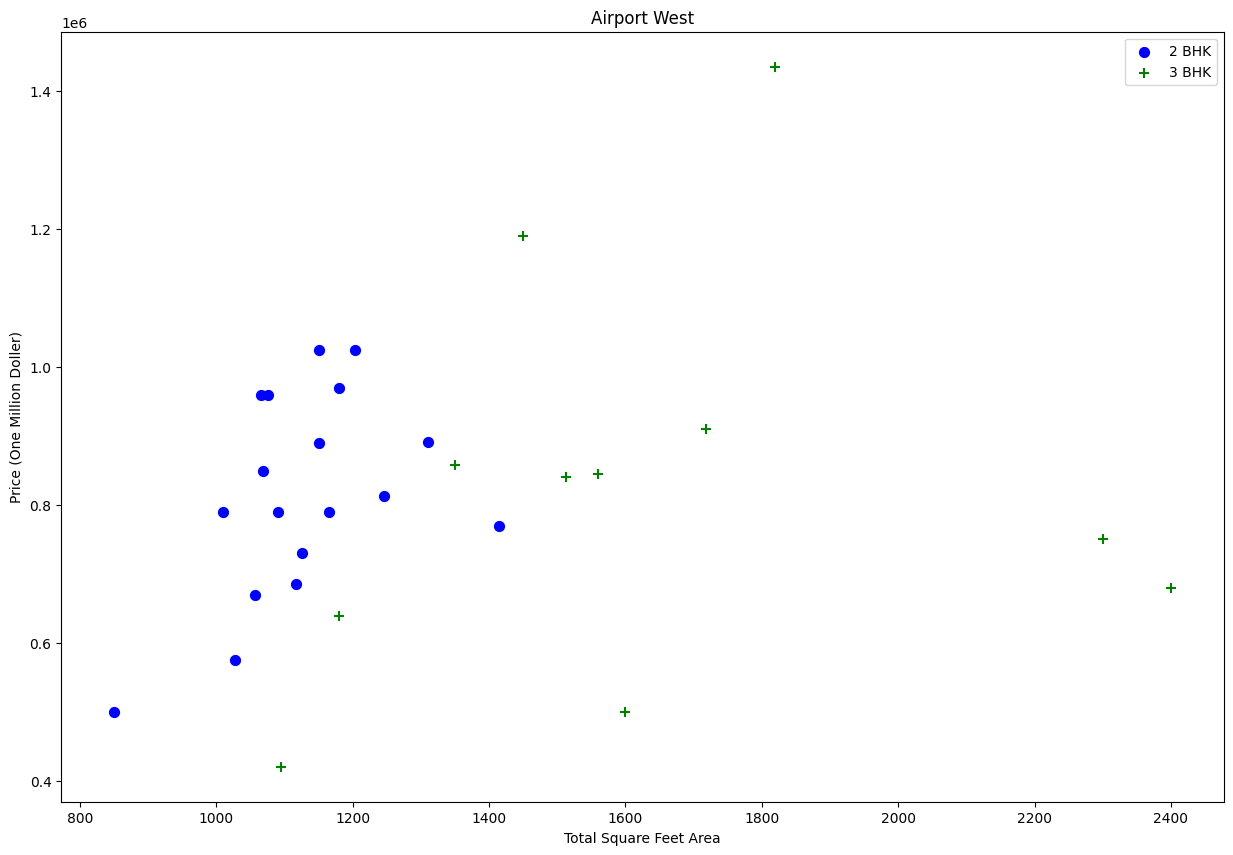

In [ ]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (One Million Doller)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Airport West")

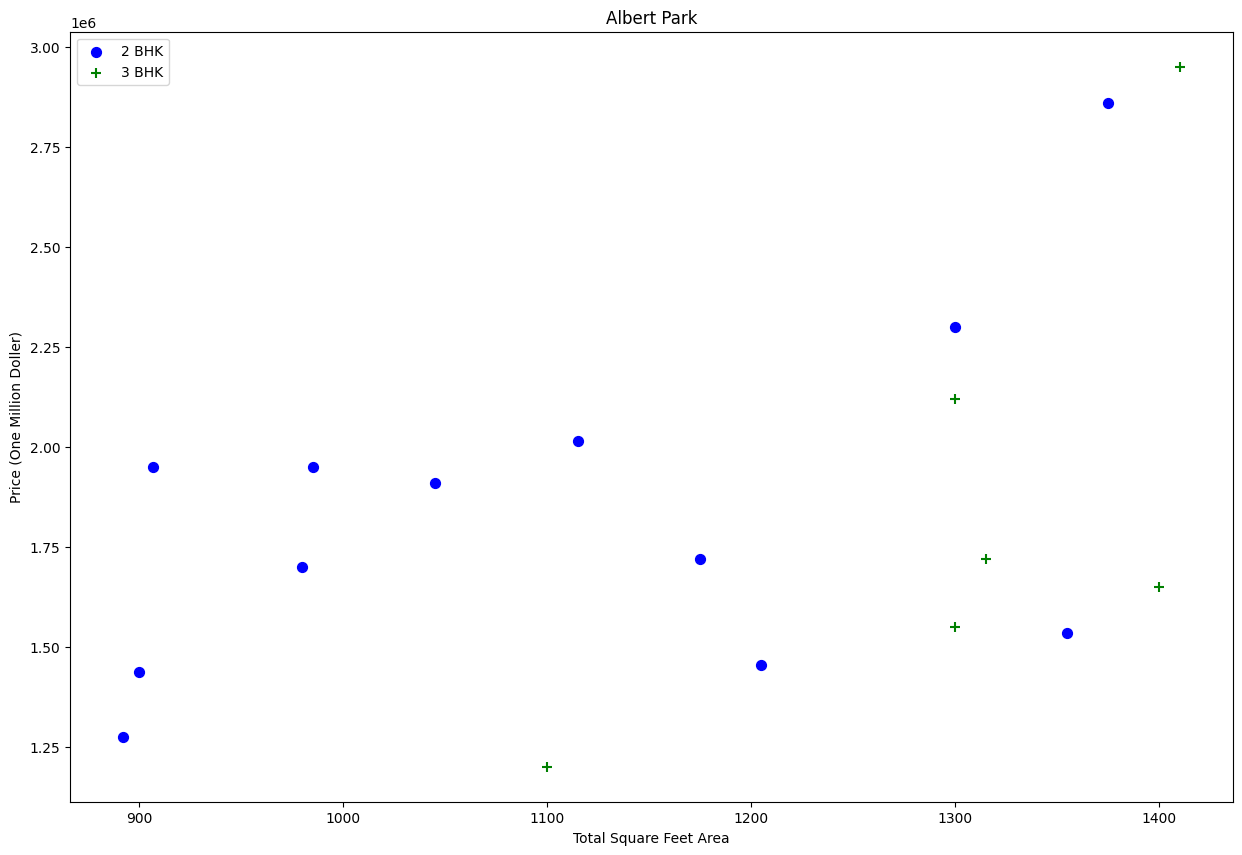

In [ ]:
plot_scatter_chart(df7,"Albert Park")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(4489, 14)

Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

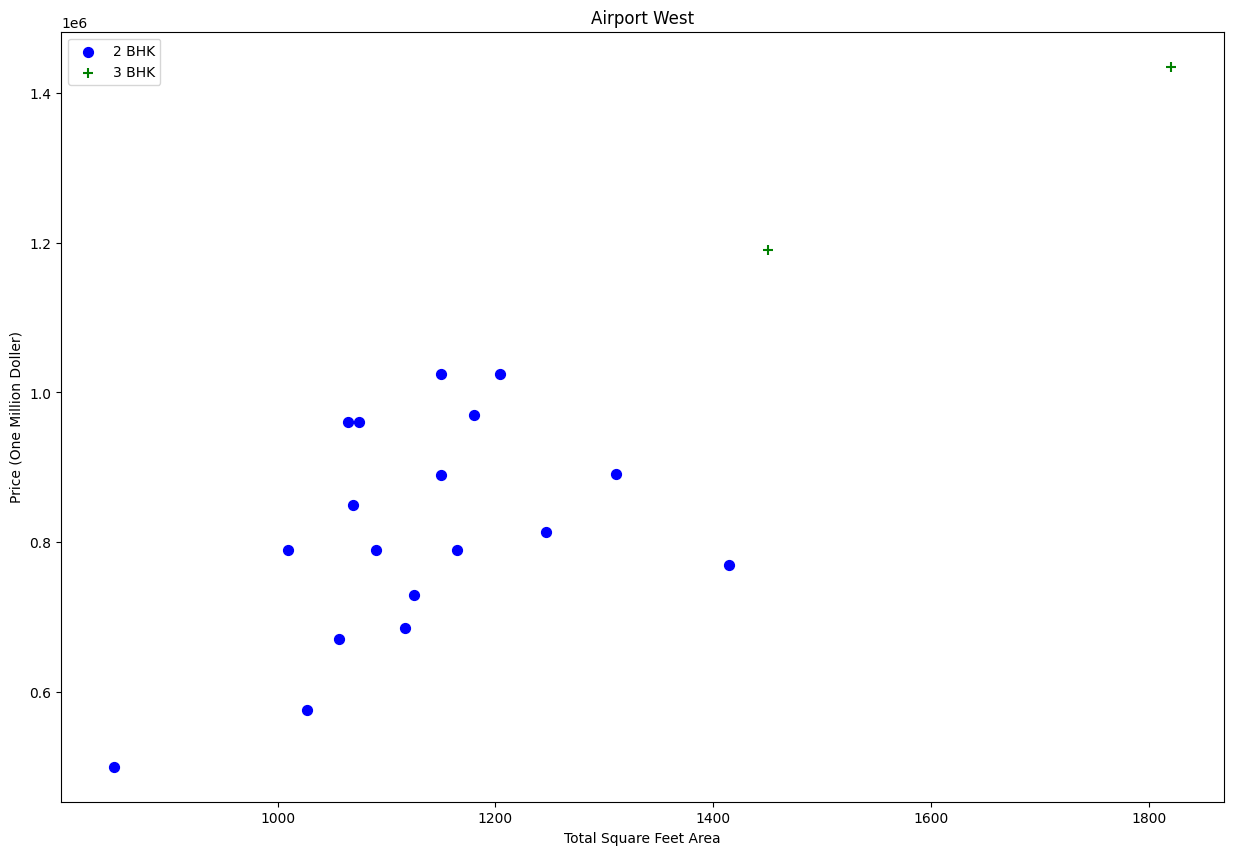

In [ ]:
plot_scatter_chart(df8,"Airport West")


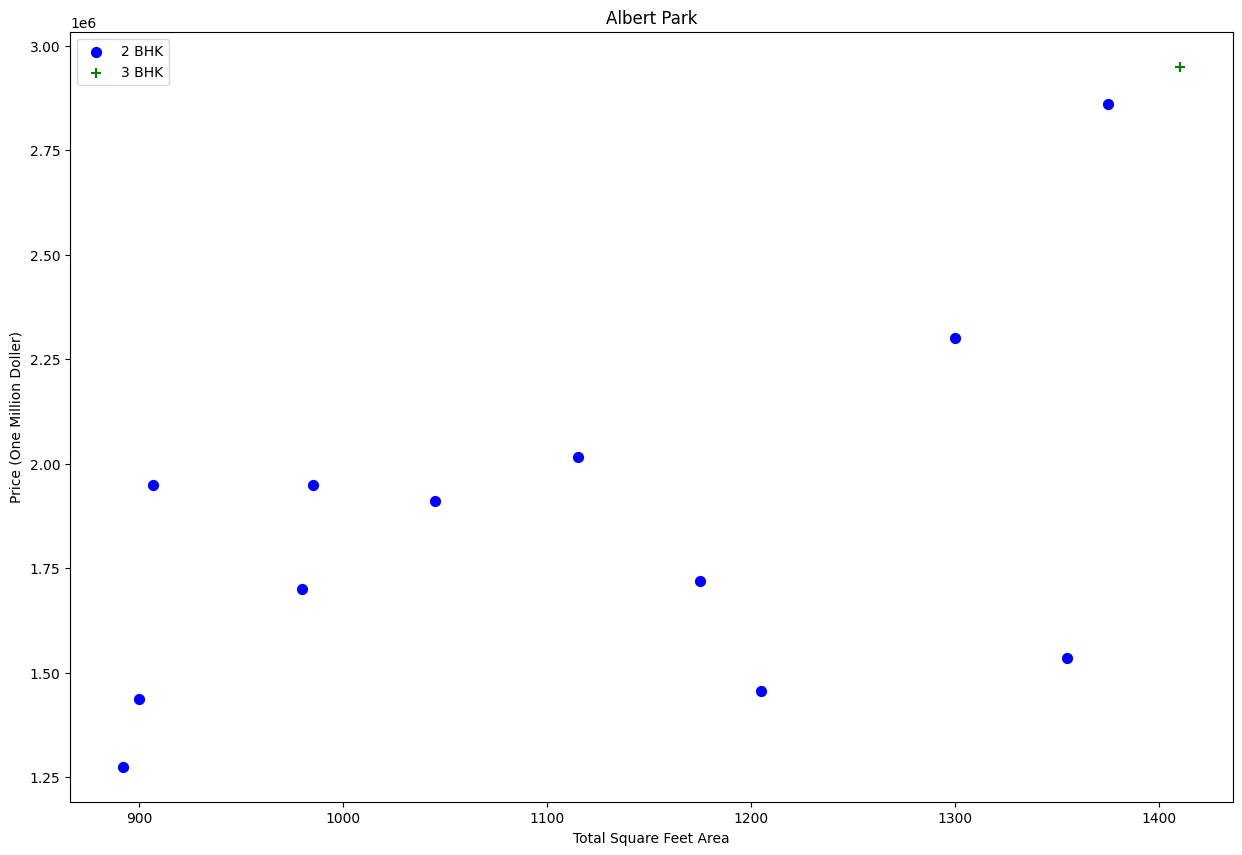

In [ ]:
plot_scatter_chart(df8,"Albert Park")

Text(0, 0.5, 'Count')

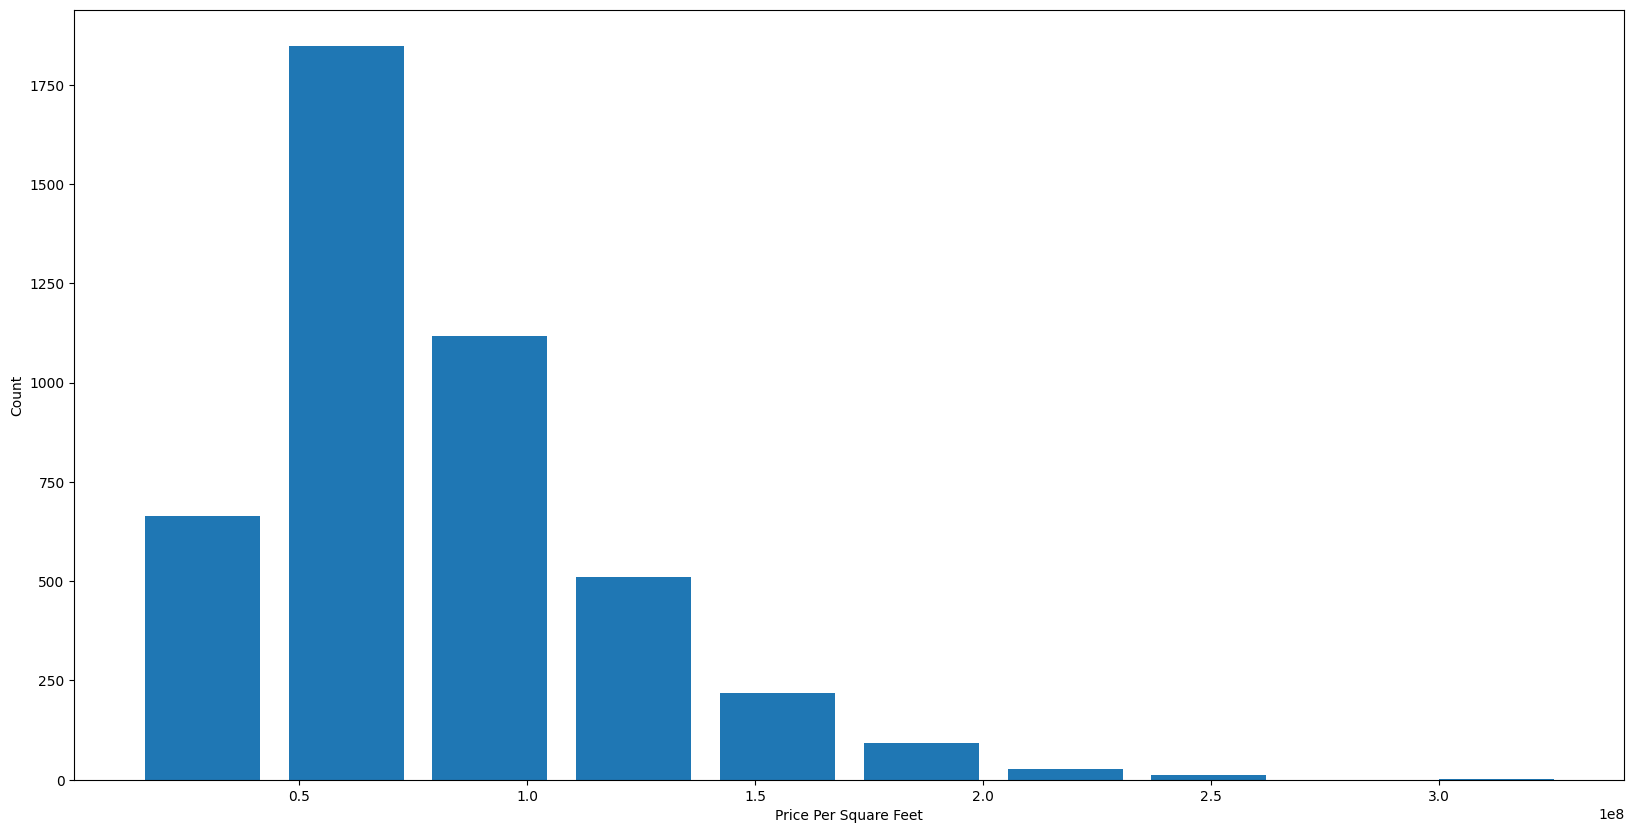

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Outlier Removal Using Bathrooms Feature

In [ ]:
df8.bath.unique()

array([2., 3., 4., 6., 5., 1., 7., 8., 9.])

Text(0, 0.5, 'Count')

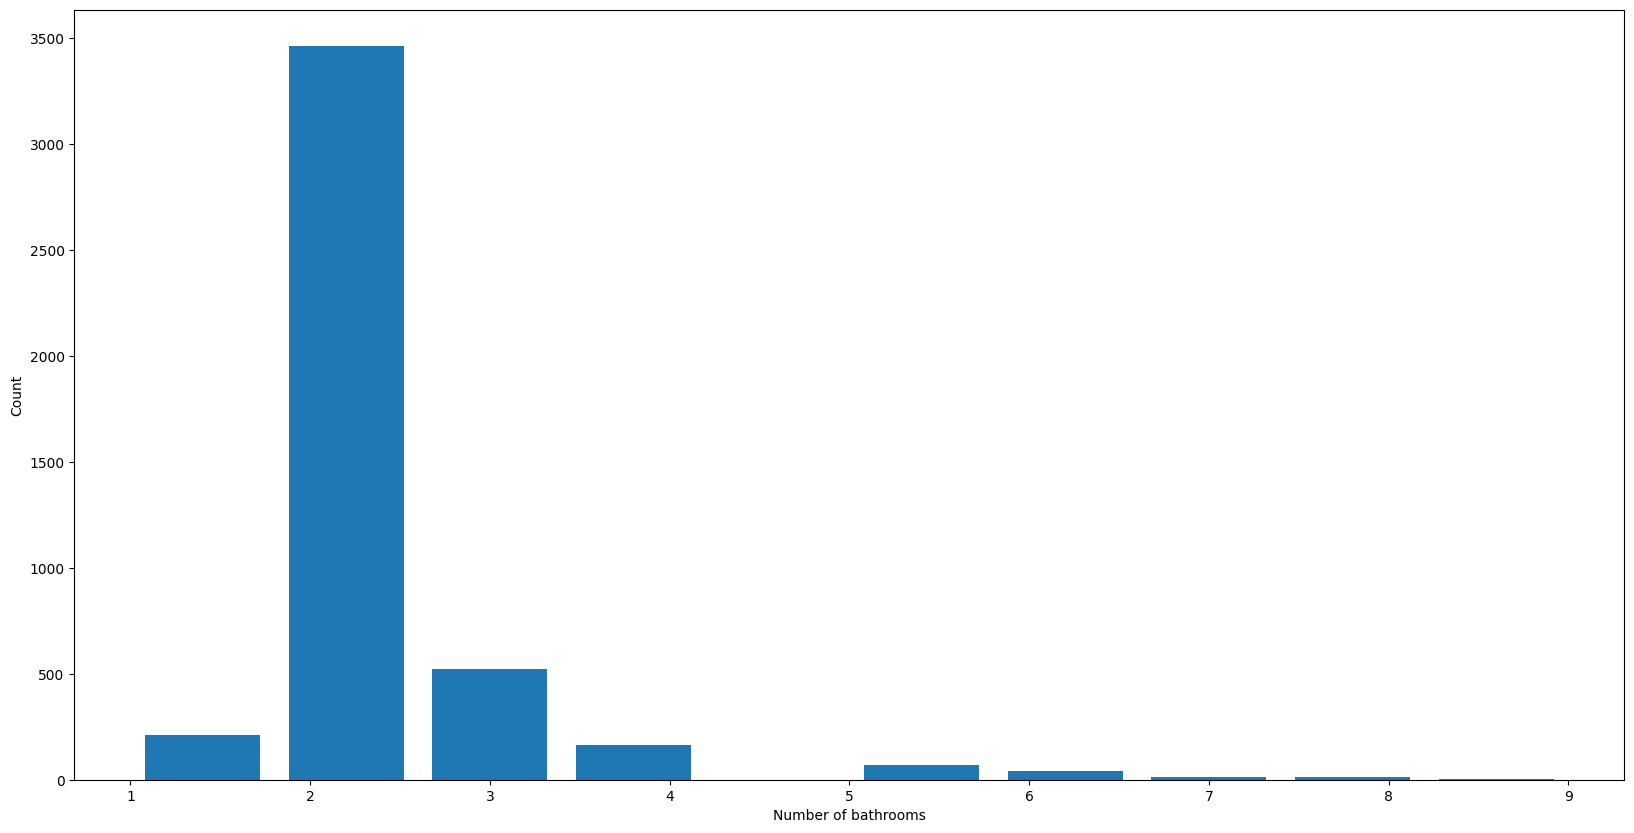

In [ ]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
df8[df8.bath>3]

,location,rooms,price,SellerG,date,post_code,total_sqft,region_name,property_count,distance,bath,size,bhk,price_per_sqft
19,Aberfeldie,5,2200000.0,Nelson,5/05/2018,3040,2072.0,Western Metropolitan,1543,7.5,4.0,3 BHK,3,1.061776e+08
21,Aberfeldie,4,1150000.0,Frank,6/10/2018,3040,2500.0,Western Metropolitan,1543,7.5,4.0,3 Bedroom,3,4.600000e+07
23,Aberfeldie,3,775000.0,McDonald,6/10/2018,3040,2400.0,Western Metropolitan,1543,7.5,4.0,3 Bedroom,3,3.229167e+07
35,Airport West,3,905000.0,Barry,3/06/2017,3042,2400.0,Western Metropolitan,3464,10.4,6.0,6 Bedroom,6,3.770833e+07
54,Airport West,2,701000.0,Barry,7/07/2018,3042,1200.0,Western Metropolitan,3464,10.4,5.0,4 Bedroom,4,5.841667e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,other,5,1900000.0,Barry,6/10/2018,3113,3600.0,Eastern Metropolitan,2003,21.1,5.0,5 Bedroom,5,5.277778e+07
7147,other,3,675000.0,Ray,7/04/2018,3180,1350.0,Eastern Metropolitan,2949,23.3,4.0,4 Bedroom,4,5.000000e+07
7151,other,3,1350000.0,Williams,7/04/2018,3018,1852.0,Western Metropolitan,852,11.0,4.0,3 BHK,3,7.289417e+07
7164,other,4,800100.0,Buckingham,7/05/2016,3093,1200.0,Eastern Metropolitan,1624,14.6,4.0,4 Bedroom,4,6.667500e+07


It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [ ]:
df8[df8.bath>df8.bhk+1]

,location,rooms,price,SellerG,date,post_code,total_sqft,region_name,property_count,distance,bath,size,bhk,price_per_sqft
293,Aspendale,3,1045000.0,hockingstuart,4/03/2017,3195,2582.0,South-Eastern Metropolitan,2824,21.5,5.0,3 BHK,3,4.047250e+07
759,Blackburn South,3,950000.0,Noel,6/01/2018,3130,2200.0,Eastern Metropolitan,4387,13.4,7.0,5 Bedroom,5,4.318182e+07
864,Brighton,3,1950000.0,Biggin,3/06/2017,3186,3800.0,Southern Metropolitan,10579,10.5,8.0,6 Bedroom,6,5.131579e+07
913,Brighton East,2,2000000.0,Buxton,1/04/2017,3187,1499.0,Southern Metropolitan,6938,10.3,5.0,3 BHK,3,1.334223e+08
1739,Clifton Hill,4,1825000.0,Biggin,6/05/2017,3068,3122.0,Northern Metropolitan,2954,3.6,6.0,4 BHK,4,5.845612e+07
1992,Dallas,5,549000.0,Raine,7/07/2018,3047,2406.0,Northern Metropolitan,2246,14.0,5.0,3 BHK,3,2.281796e+07
2166,Doncaster East,4,1165000.0,Barry,6/10/2018,3109,1200.0,Eastern Metropolitan,10999,14.3,4.0,2 Bedroom,2,9.708333e+07
2834,Glen Iris,2,1500000.0,Marshall,4/06/2016,3146,1200.0,Southern Metropolitan,10412,7.3,5.0,3 Bedroom,3,1.250000e+08
3485,Ivanhoe,3,1220000.0,Miles,6/01/2018,3079,3000.0,Eastern Metropolitan,5549,7.8,8.0,6 Bedroom,6,4.066667e+07
4145,Middle Park,6,5600000.0,Marshall,3/06/2017,3206,2700.0,Southern Metropolitan,2019,3.0,6.0,4 Bedroom,4,2.074074e+08


Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [ ]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(4474, 14)

In [ ]:
df9.head(2)

,location,rooms,price,SellerG,date,post_code,total_sqft,region_name,property_count,distance,bath,size,bhk,price_per_sqft
0,Abbotsford,3,1490000.0,Jellis,1/04/2017,3067,1520.0,Northern Metropolitan,4019,3.0,2.0,2 BHK,2,9.802632e+07
6,Abbotsford,4,1720000.0,Collins,5/05/2018,3067,1419.0,Northern Metropolitan,4019,3.0,2.0,2 BHK,2,1.212121e+08


In [ ]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,rooms,price,SellerG,date,post_code,total_sqft,region_name,property_count,distance,bath,bhk
0,Abbotsford,3,1490000.0,Jellis,1/04/2017,3067,1520.0,Northern Metropolitan,4019,3.0,2.0,2
6,Abbotsford,4,1720000.0,Collins,5/05/2018,3067,1419.0,Northern Metropolitan,4019,3.0,2.0,2
7,Abbotsford,3,1150000.0,Biggin,6/10/2018,3067,980.0,Northern Metropolitan,4019,3.0,2.0,2


Use One Hot Encoding For Location

In [ ]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,Abbotsford,Aberfeldie,Airport West,Albert Park,Albion,Alphington,Altona,Altona Meadows,Altona North,Ardeer,...,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,rooms,price,SellerG,date,post_code,total_sqft,region_name,property_count,distance,...,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville
0,Abbotsford,3,1490000.0,Jellis,1/04/2017,3067,1520.0,Northern Metropolitan,4019,3.0,...,False,False,False,False,False,False,False,False,False,False
6,Abbotsford,4,1720000.0,Collins,5/05/2018,3067,1419.0,Northern Metropolitan,4019,3.0,...,False,False,False,False,False,False,False,False,False,False
7,Abbotsford,3,1150000.0,Biggin,6/10/2018,3067,980.0,Northern Metropolitan,4019,3.0,...,False,False,False,False,False,False,False,False,False,False
8,Abbotsford,2,1445000.0,Jellis,6/10/2018,3067,1275.0,Northern Metropolitan,4019,3.0,...,False,False,False,False,False,False,False,False,False,False
10,Abbotsford,2,1457500.0,Jellis,7/07/2018,3067,1100.0,Northern Metropolitan,4019,3.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,rooms,price,SellerG,date,post_code,total_sqft,region_name,property_count,distance,bath,...,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville
0,3,1490000.0,Jellis,1/04/2017,3067,1520.0,Northern Metropolitan,4019,3.0,2.0,...,False,False,False,False,False,False,False,False,False,False
6,4,1720000.0,Collins,5/05/2018,3067,1419.0,Northern Metropolitan,4019,3.0,2.0,...,False,False,False,False,False,False,False,False,False,False


Build a Model Now...

In [ ]:
df12.shape

(4474, 236)

In [ ]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,rooms,SellerG,date,post_code,total_sqft,region_name,property_count,distance,bath,bhk,...,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville
0,3,Jellis,1/04/2017,3067,1520.0,Northern Metropolitan,4019,3.0,2.0,2,...,False,False,False,False,False,False,False,False,False,False
6,4,Collins,5/05/2018,3067,1419.0,Northern Metropolitan,4019,3.0,2.0,2,...,False,False,False,False,False,False,False,False,False,False
7,3,Biggin,6/10/2018,3067,980.0,Northern Metropolitan,4019,3.0,2.0,2,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X.shape

(4474, 235)

In [ ]:
y = df12.price
y.head(3)

,price
0,1490000.0
6,1720000.0
7,1150000.0


In [ ]:
len(y)

4474

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)



In [98]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming df12 is your DataFrame and 'price' is your target variable

# Convert 'price' column to numeric, handling errors
df12['price'] = pd.to_numeric(df12['price'], errors='coerce')

# Remove rows with NaN values in 'price'
df12 = df12.dropna(subset=['price'])

# Remove rows with NaN values in other columns (if any)
df12 = df12.dropna()

# Convert categorical columns to numeric using one-hot encoding
df12 = pd.get_dummies(df12, drop_first=True)

# Define the feature set (X) and the target variable (y)
X = df12.drop('price', axis=1)
y = df12['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the LinearRegression model
lr_clf = LinearRegression()

# Train the model using the training data
lr_clf.fit(X_train, y_train)

# Evaluate the model on the test data
score = lr_clf.score(X_test, y_test)
print(f"Model R-squared score: {score}")


Model R-squared score: 0.6644959828576746


Use K Fold cross validation to measure accuracy of our LinearRegression model

In [99]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)


array([ 6.58502878e-01,  6.87790667e-01, -1.15172786e+13, -5.84262397e+14,
       -8.09686312e+11])

We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

Find best model using GridSearchCV

In [101]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                # Remove 'normalize' as it's deprecated in newer versions
                # 'normalize': [True, False]  (Removed this line)
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                # Replace 'mse' with 'squared_error'
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    # ShuffleSplit is used to split the data into multiple subsets
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    # Loop through each algorithm and perform GridSearchCV
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Assuming X and y are already defined
find_best_model_using_gridsearchcv(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.269e+14, tolerance: 9.465e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.294e+14, tolerance: 9.469e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.244e+14, tolerance: 9.459e

,model,best_score,best_params
0,linear_regression,-1.193179e+14,{}
1,lasso,6.587803e-01,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,5.151858e-01,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

Test the model for few properties

In [103]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [104]:
predict_price('Bonbeach',1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


237066826.73107955

In [105]:

predict_price('Bonbeach',1000, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


237067731.2520344

In [106]:
predict_price('Hillside',1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


236820768.2722704

In [107]:
predict_price('Hillside',1000, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


236821672.79322526


Export the tested model to a pickle file

In [108]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)


Export location and column information to a file that will be useful later on in our prediction application

In [109]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))
